# Who won the most medals at the Olympics....?

#### **If you want to know who won the most medals at the Olympics,** you're going to need some Olympic data to look at.
Start with a dataset from KAGGLE containing Olympic data from 1896 to through the last games in 2016.  It has just over 270,000 entries and 17 categories. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('athlete_events.csv')
df = pd.DataFrame(data)

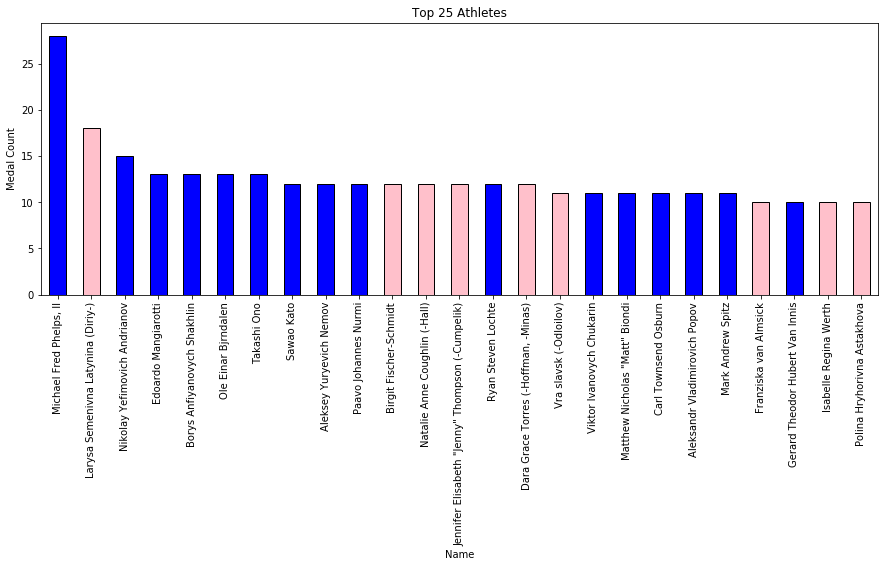

In [23]:
#which athlete won the most medals?

athlete_medals = df.groupby('Name')['Medal'].count().sort_values(ascending=False).head(25)

top_medal = athlete_medals.values[0]
top_athlete = athlete_medals.index[0]
top_country = df.NOC[df['Name']==top_athlete].values[0]

comp = df[df['Name'].isin(athlete_medals.index)]
comp = comp[['Name', 'Age', 'Year', 'Medal', 'Event', 'NOC']]

medal_breakdown = comp.pivot_table(index=['Name', 'Year'], columns='Medal', values='Event', aggfunc='count', fill_value=0)
medal_breakdown = medal_breakdown[['Bronze', 'Silver', 'Gold']]
medal_breakdown['Total'] = medal_breakdown.sum(axis=1)
#medal_breakdown = medal_breakdown.sort_index(by='Total')

#print(medal_breakdown.head(15))
# would like to be able to sort table by index order of athlete_medals - (top athletes->)


#plot the top 10 athletes by medals
fig = plt.figure(figsize=(15,5))
names = athlete_medals.index.tolist()
sex = df[df['Name'].isin(names)]

top_males = sex.groupby('Sex')['Name'].get_group('M').unique().tolist()
top_females = sex.groupby('Sex')['Name'].get_group('F').unique().tolist()

my_color = np.where(athlete_medals.index.isin(top_females), 'pink', 'blue') 

athlete_medals.plot(kind='bar', color=my_color, edgecolor='k', title='Top 25 Athletes')
plt.ylabel('Medal Count')
plt.show()

The top 25 medal winners of all time are plotted above.  The blue color bars indicates male athlete while the pink indicates female.  You can see that Michael Phelps (M) of the USA is the athlete with the most medals and the second most medalled athlete is Larysa Semenivna Latynina (F) of the Soviet Union.

After finding out who the top medal winners are and seeing the second most medalled athlete is female, you're going to want to..... 

**Find out the number of medals won by males vs. females...?**"

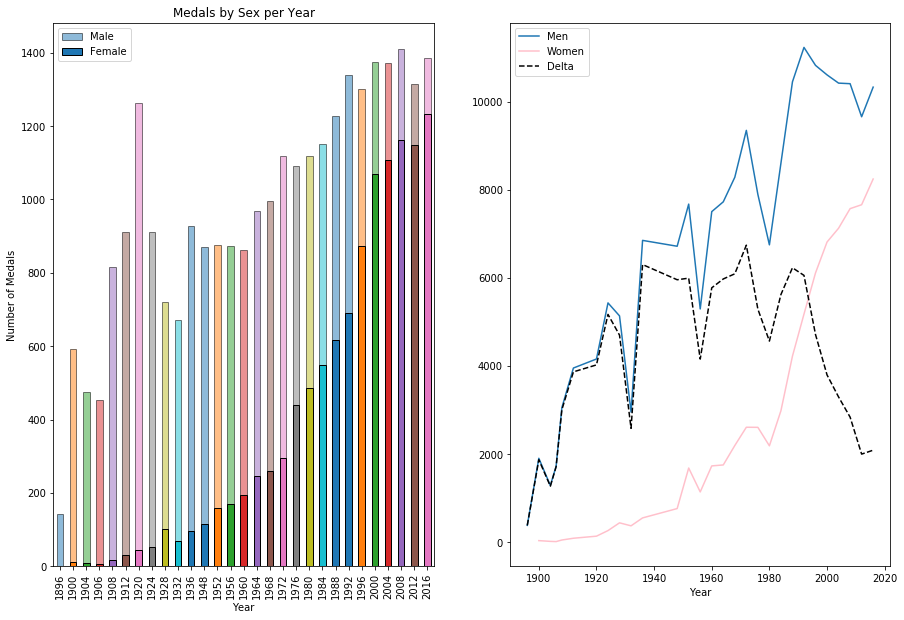

In [13]:
#men vs women medals by year
men = df[df['Sex'] == 'M']
women = df[df['Sex'] == 'F']
#print(men.head())


#combine winter and summer after 1992
men_combo = men.groupby('Year')['Medal', 'Name'].count()
men_combo = men_combo[men_combo.index>=1994].reset_index()

summermen = men_combo[men_combo.index %2 == 0]
mens_medal_summer = summermen['Medal'].tolist()
mens_athlete_summer = summermen['Name'].tolist()

wintermen = men_combo[men_combo.index %2 != 0]
mens_medal_winter = wintermen['Medal'].tolist()
mens_athlete_winter = wintermen['Name'].tolist()

summed_medals = [x+y for x,y in zip(mens_medal_summer, mens_medal_winter)]
summed_athletes = [x+y for x,y in zip(mens_athlete_summer, mens_athlete_winter)]

women_combo = women.groupby('Year')['Medal', 'Name'].count()
women_combo = women_combo[women_combo.index>=1994].reset_index()

summerwomen = women_combo[women_combo.index %2 == 0]
women_medal_summer = summerwomen['Medal'].tolist()
women_athlete_summer = summerwomen['Name'].tolist()

winterwomen = women_combo[women_combo.index %2 != 0]
women_medal_winter = winterwomen['Medal'].tolist()
women_athlete_winter = winterwomen['Name'].tolist()

summed_women_medals = [x+y for x,y in zip(women_medal_summer, women_medal_winter)]
summed_women_athletes = [x+y for x,y in zip(women_athlete_summer, women_athlete_winter)]


#replace the summer values after 1992 with the sums and drop the winter months
drop_yrs = [1994, 1998, 2002, 2006, 2010, 2014]
rep_yrs = [1996, 2000, 2004, 2008, 2012, 2016]

mens_medals = men.groupby('Year')['Medal'].count()
mens_medals = mens_medals.drop(drop_yrs)
mens_medals.loc[rep_yrs] = summed_medals

womens_medals = women.groupby('Year')['Medal'].count()
womens_medals.loc[1896] = 0
womens_medals = womens_medals.sort_index()
womens_medals = womens_medals.drop(drop_yrs)
womens_medals.loc[rep_yrs] = summed_women_medals
#print(type(womens_medals))
#print(womens_medals)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,10))
mens_medals.plot(kind='bar', alpha=.5, edgecolor='black', ax=ax1)
womens_medals.plot(kind='bar', edgecolor='black', title='Medals by Sex per Year', ax=ax1)
ax1.set_ylabel('Number of Medals')
leg = ax1.legend(['Male', 'Female'])


#check the number of men and women athletes over time
men_yr = men.groupby('Year')['Name'].count()
men_yr = men_yr.drop(drop_yrs)
men_yr.loc[rep_yrs] = summed_athletes

women_yr = women.groupby('Year')['Name'].count()
women_yr = women_yr.drop(drop_yrs)
women_yr.loc[rep_yrs] = summed_women_athletes

mf_delta = men_yr-women_yr
mf_delta.loc[1896]=men_yr.loc[1896]

test = pd.concat([men_yr, women_yr, mf_delta], axis=1)
test.columns = ['Men', 'Women', 'Delta']
#print(test)

men_yr.plot(kind='line', ax=ax2)
women_yr.plot(kind='line', ax=ax2, color='pink')
mf_delta.plot(kind='line', ax=ax2, color='k', linestyle='--')
leg = ax2.legend(['Men', 'Women', 'Delta'])
plt.show()

The plots above show the number of medals won by males and females and the number of male and female athletes that competed for each year throughout the Olympics.  The rate at which medals were won by males and females appears to be correlated to the rate at which male and female athletes joined the games.  After 1960, the number of women competing in the Olympics started to spike and the number of medals won by females increases proportionally.  This could be correlated to the female indepence movements taking place during these years (i.e. 1972 - Title IX is passed).

Now that you've seen the way the total number of medals won and athletes competing in the games has increased over the years....

**You are going to want to know what the total medals and total athletes per year look like...**

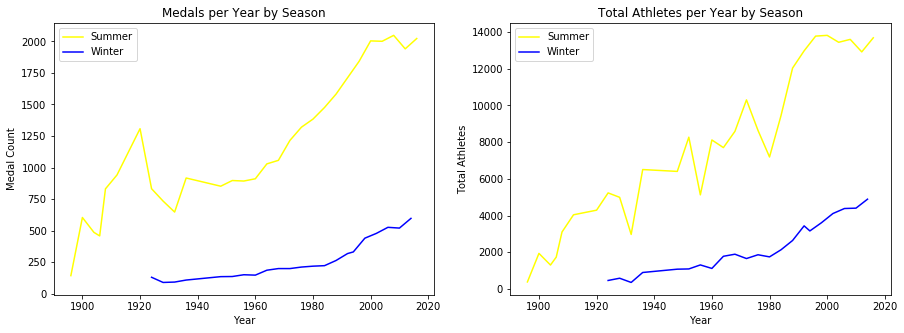

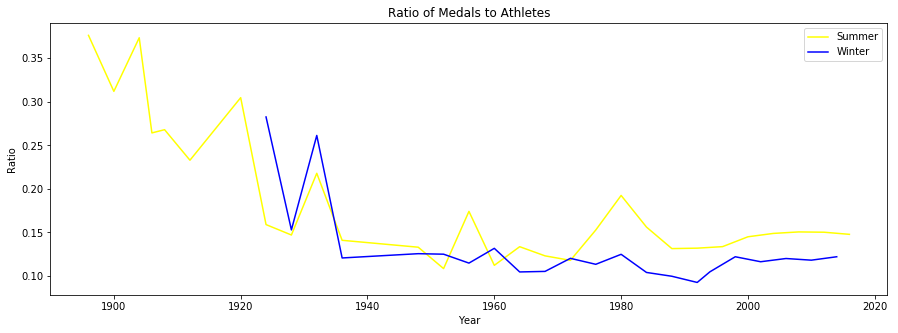

In [4]:
# medals by year separated by season
summer = df[df['Season'] == 'Summer']
winter = df[df['Season'] == 'Winter']
summer_medals_by_year = summer.groupby('Year')['Medal'].count()
winter_medals_by_year = winter.groupby('Year')['Medal'].count()
sum_of_summer_athletes_per_year = summer.groupby('Year')['Name'].count()
sum_of_winter_athletes_per_year = winter.groupby('Year')['Name'].count()

#medals per year by season 
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 5))
summer_medals_by_year.plot(kind='line', ax=ax1, color='yellow')
winter_medals_by_year.plot(kind='line', ax=ax1, title='Medals per Year by Season', color='blue')
ax1.set_ylabel('Medal Count')
leg = ax1.legend(['Summer', 'Winter'])

#total athletes per year by sesason
sum_of_summer_athletes_per_year.plot(kind='line', ax=ax2, color='yellow')
sum_of_winter_athletes_per_year.plot(kind='line', ax=ax2, color='blue', title='Total Athletes per Year by Season')
ax2.set_ylabel('Total Athletes')
leg = ax2.legend(['Summer', 'Winter'])
plt.show()

#ratio of medals to athlete per year
fig = plt.figure(figsize=(15,5))
ratio_summer = summer_medals_by_year/sum_of_summer_athletes_per_year
ratio_summer.plot(kind='line', color='yellow')
ratio_winter = winter_medals_by_year/sum_of_winter_athletes_per_year
ratio_winter.plot(kind='line', color='blue', title='Ratio of Medals to Athletes')
plt.ylabel('Ratio')
leg = plt.legend(['Summer', 'Winter'])
plt.show()

You can see that the number of medals won and the number of athletes both increase over the years but what about the competition?  The final plot shows a ratio of the number of medals won divided by the total number of athletes.  This ratio can be considered an expression of the level of competition over time.  The lower the ratio the higher the degree of competition for that year.  You can see that as we approach present day the level of competition increased (i.e. it has become harder to win a medal over time).

Knowing that the medals and athletes increased along with the level of competition has made you curious about the most medalled countries. What countries have been the most successful throughout the games?  If you're asking this you're going to have to....

**Find the top countries by medal...**

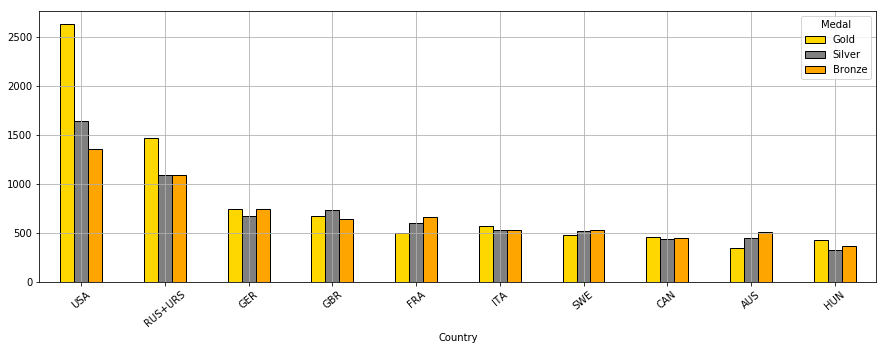

In [14]:
#separate top 10 countries by medal
counted = df.pivot_table(index='NOC', columns='Medal', values='Event', aggfunc='count')
counted['Totals'] = counted.sum(axis='columns')

combo1 = counted.transpose()
combo1['RUS+URS'] = combo1['URS'] + combo1['RUS']
combo1 = combo1.drop(columns=['RUS', 'URS'])
combo1 = combo1.transpose().sort_values('Totals', ascending=False)

top_counted = combo1.iloc[0:10]
top_counted = top_counted[['Gold', 'Silver', 'Bronze']]

top_counted.plot(kind='bar', rot=40, grid=True, color=['gold', 'grey', 'orange'],  edgecolor='black', figsize=(15,5))
plt.xlabel('Country')
plt.show()


The USA has clearly dominated the medal count by country throughout the course of the Olympics.  The second closest country is Russia (including the Soviet Union).  Seeing the USA and Russia at the top of the medal count list, you probably will want to....

**Look at the Olympic rivalry between the United States and Russia...**

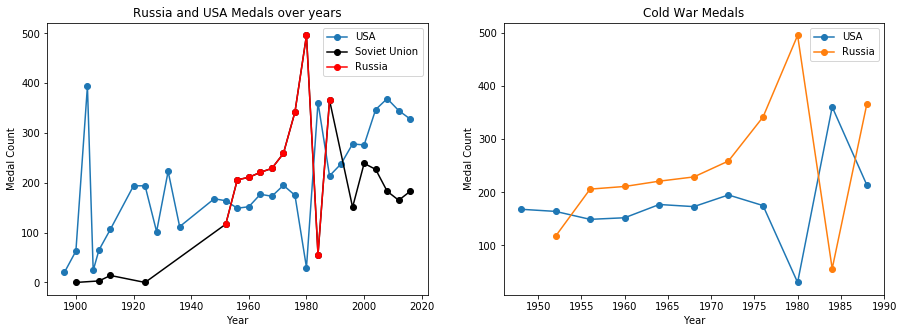

In [26]:
#replace values after 1992 with the sums and drop the winter months
drop_yrs = [1994, 1998, 2002, 2006, 2010, 2014]
rep_yrs = [1996, 2000, 2004, 2008, 2012, 2016]

#grab USA medals alone and add winter and summer after 1994
USA_grouped = df.loc[df.NOC == 'USA'].groupby('Year')['Medal'].count()
usa_split = USA_grouped[USA_grouped.index >= 1994].reset_index()
usa_split_winter = usa_split[usa_split.index % 2 == 0]
usa_split_summer = usa_split[usa_split.index % 2 != 0]
usa_split_winter = usa_split_winter['Medal'].tolist()
usa_split_summer = usa_split_summer['Medal'].tolist()
usa_win_sum_list = [x+y for x,y in zip(usa_split_winter, usa_split_summer)]

#drop winter and add the combined counts
USA_grouped = USA_grouped.drop(drop_yrs)
USA_grouped.loc[rep_yrs] = usa_win_sum_list

#grab RUS medals alone
RUS_grouped = df.loc[(df.NOC == 'RUS') | (df.NOC == 'URS')].groupby('Year')['Medal'].count()
rus_split = RUS_grouped[RUS_grouped.index >= 1994].reset_index()
rus_split_winter = rus_split[rus_split.index % 2 == 0]
rus_split_summer = rus_split[rus_split.index % 2 != 0]
rus_split_winter = rus_split_winter['Medal'].tolist()
rus_split_summer = rus_split_summer['Medal'].tolist()
rus_win_sum_list = [x+y for x,y in zip(rus_split_winter, rus_split_summer)]

#drop winter and add the combined counts
RUS_grouped = RUS_grouped.drop(drop_yrs)
RUS_grouped.loc[rep_yrs] = rus_win_sum_list

#check to make sure RUS was RUS the whole time and nothing else
rus_check = df['NOC'].value_counts()
RUS = df.loc[df.NOC == 'RUS'].groupby('Year').count()
URS = df.loc[df.NOC == 'URS'].groupby('Year').count()

#grab the cold war years alone (1947 - 1991)
USA_cold = USA_grouped.loc[1947:1991]
RUS_cold = RUS_grouped.loc[1947:1991]

#plot USA and RUS medals over time
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 5))
USA_grouped.plot(x='Year', kind='line', ax=ax, marker='o')
RUS_grouped.plot(x='Year', kind='line', color='black', title='Russia and USA Medals over years', ax=ax, marker='o')
URS.Medal.plot(kind='line', color='red', ax=ax, marker='o')

ax.set_ylabel('Medal Count')
leg = ax.legend(["USA", "Soviet Union", 'Russia'])

USA_cold.plot(x='Year', kind='line', ax=ax1, marker='o')
RUS_cold.plot(x='Year', kind='line', ax=ax1, title='Cold War Medals', marker='o')

plt.ylabel('Medal Count')
plt.legend(["USA", 'Russia'])

plt.show()

What stands out from these plots is that the USA won more medals than Russia every single Olympics except for the games that were played during the Cold War (1947 - 1991).  The years during which Russia was most successful over the United States, it was known as the Soviet Union.  The United States and the Soviet Union both took the Olympics very seriously, using the games as a platform for displaying their nations' power.  One significant event to point out is the Miracle on Ice - US vs URS men's ice hockey which took place in Lake Placid, NY 1980 Winter Olympic Games.  The US men's ice hockey team was able to defeat the x4 Gold Medal defending Soviets in what would become one of the most iconic sports moments in history.  The US men's hockey team would go on to win a gold for the United States in a year where the USA won the least amount of medals since 1906.



All the excitement of the rivalry between the United States and Russia has got you wanting to know more about what is hiding in this dataset.  So chances are.... 
**You are going to do a search for the unique values in each column...**

In [7]:
# get a list of all the unique values in the data set

#names = df['Name'].unique()
#print(len(names))
#print(df.Name.nunique())

for x in df.columns:
    a = str(x)
    s = str(df[x].nunique())
    print(a + ' = ' + s)

ID = 135571
Name = 134732
Sex = 2
Age = 74
Height = 95
Weight = 220
Team = 1184
NOC = 230
Games = 51
Year = 35
Season = 2
City = 42
Sport = 66
Event = 765
Medal = 3


There are 74 unique ages!? That is an awfully large spread for some of the most competitive events in the world.  This has got have to investigate this further...

**What is the distribution of ages in the Olympics?**

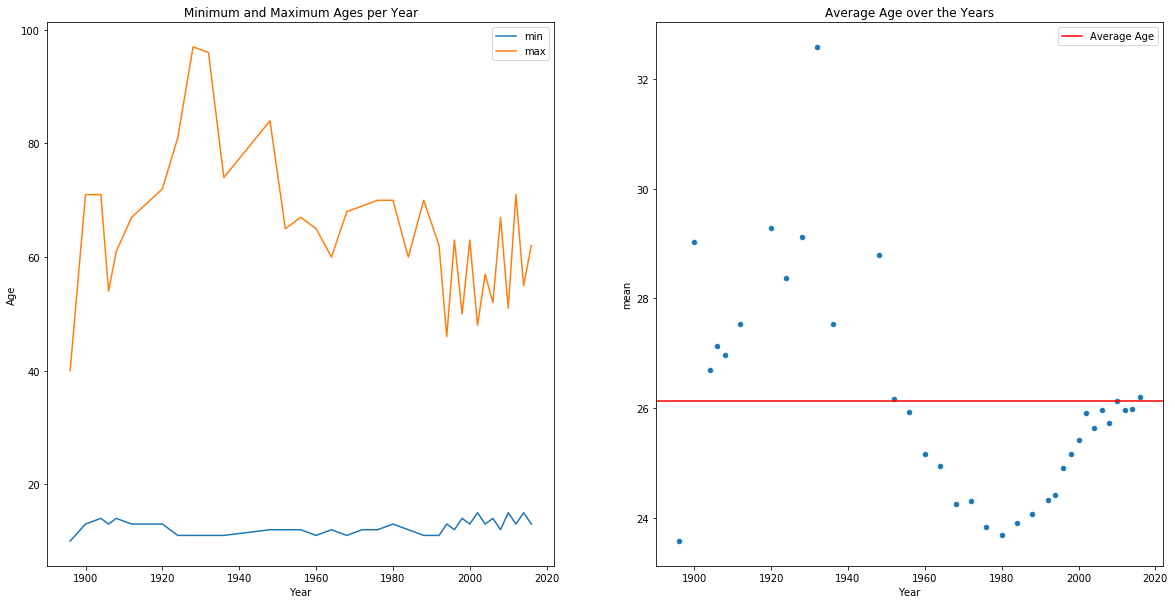

In [38]:
# look at age distribution and where max and min occur

age = df.groupby('Year').agg({'Age':['min','max','mean']})
age.columns = age.columns.droplevel()
age = age.reset_index()
avg_age = age['mean'].mean()
age['Delta'] = age['max'] - age['min']

#find out what countries send the youngest competitors
youngest_ages = [10, 11, 12, 13, 14, 15]
youngest = df[df['Age'].isin(youngest_ages)]
young1 = youngest['NOC'].unique()


#find who was the extreme competitors and what team/event he competed in
oldest = df.loc[df['Age'].idxmax()]
youngest_athlete = df.loc[df['Age'].idxmin()]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

age.plot(x='Year', y=['min', 'max'], kind='line', title='Minimum and Maximum Ages per Year', ax=ax1)
ax1.set_ylabel('Age')
age.plot(x='Year', y='mean', kind='scatter', title='Average Age over the Years', ax=ax2)
plt.axhline(avgage, xmin=0, xmax=1, color='r', label='Average Age')
plt.legend()

plt.show()

The youngest competitors came from 157 different countries, with the youngest athlete being **Dimitrios Loundras**, age 10, from Greece.  He competed in the 1896 Summer Games in Athina (Athens) for Greece in *Gymnastics*, specifically the *men's parallel bars*.  **Loundras** was the bronze medal winner in the event.  The maximum age is 97 for athlete **John Quincy Adams Ward**, who competed for **TEAM USA** in *Art Competitions* in the 1928 Summer games in Amsterdam.  One thing to point out is the oscillation of the average ages in competitors over the years that appears to be converging to the average age.  This could be due to the increasing number of competitors and increasing competition, which was observed previously.

Interestingly, the youngest athletes in every Olympics are still in middle school.  Of all the youngest athletes competing in any Olymipcs the oldest is just 15 years old!

Seeing that the oldest athlete at age 97 was a competitor in _Olympic Art Competitions_ has brewed up some intreguing thoughts.  Have the events at the games always been the same?

**Now you have to know how the Olympic games have changed from conception to present day....**

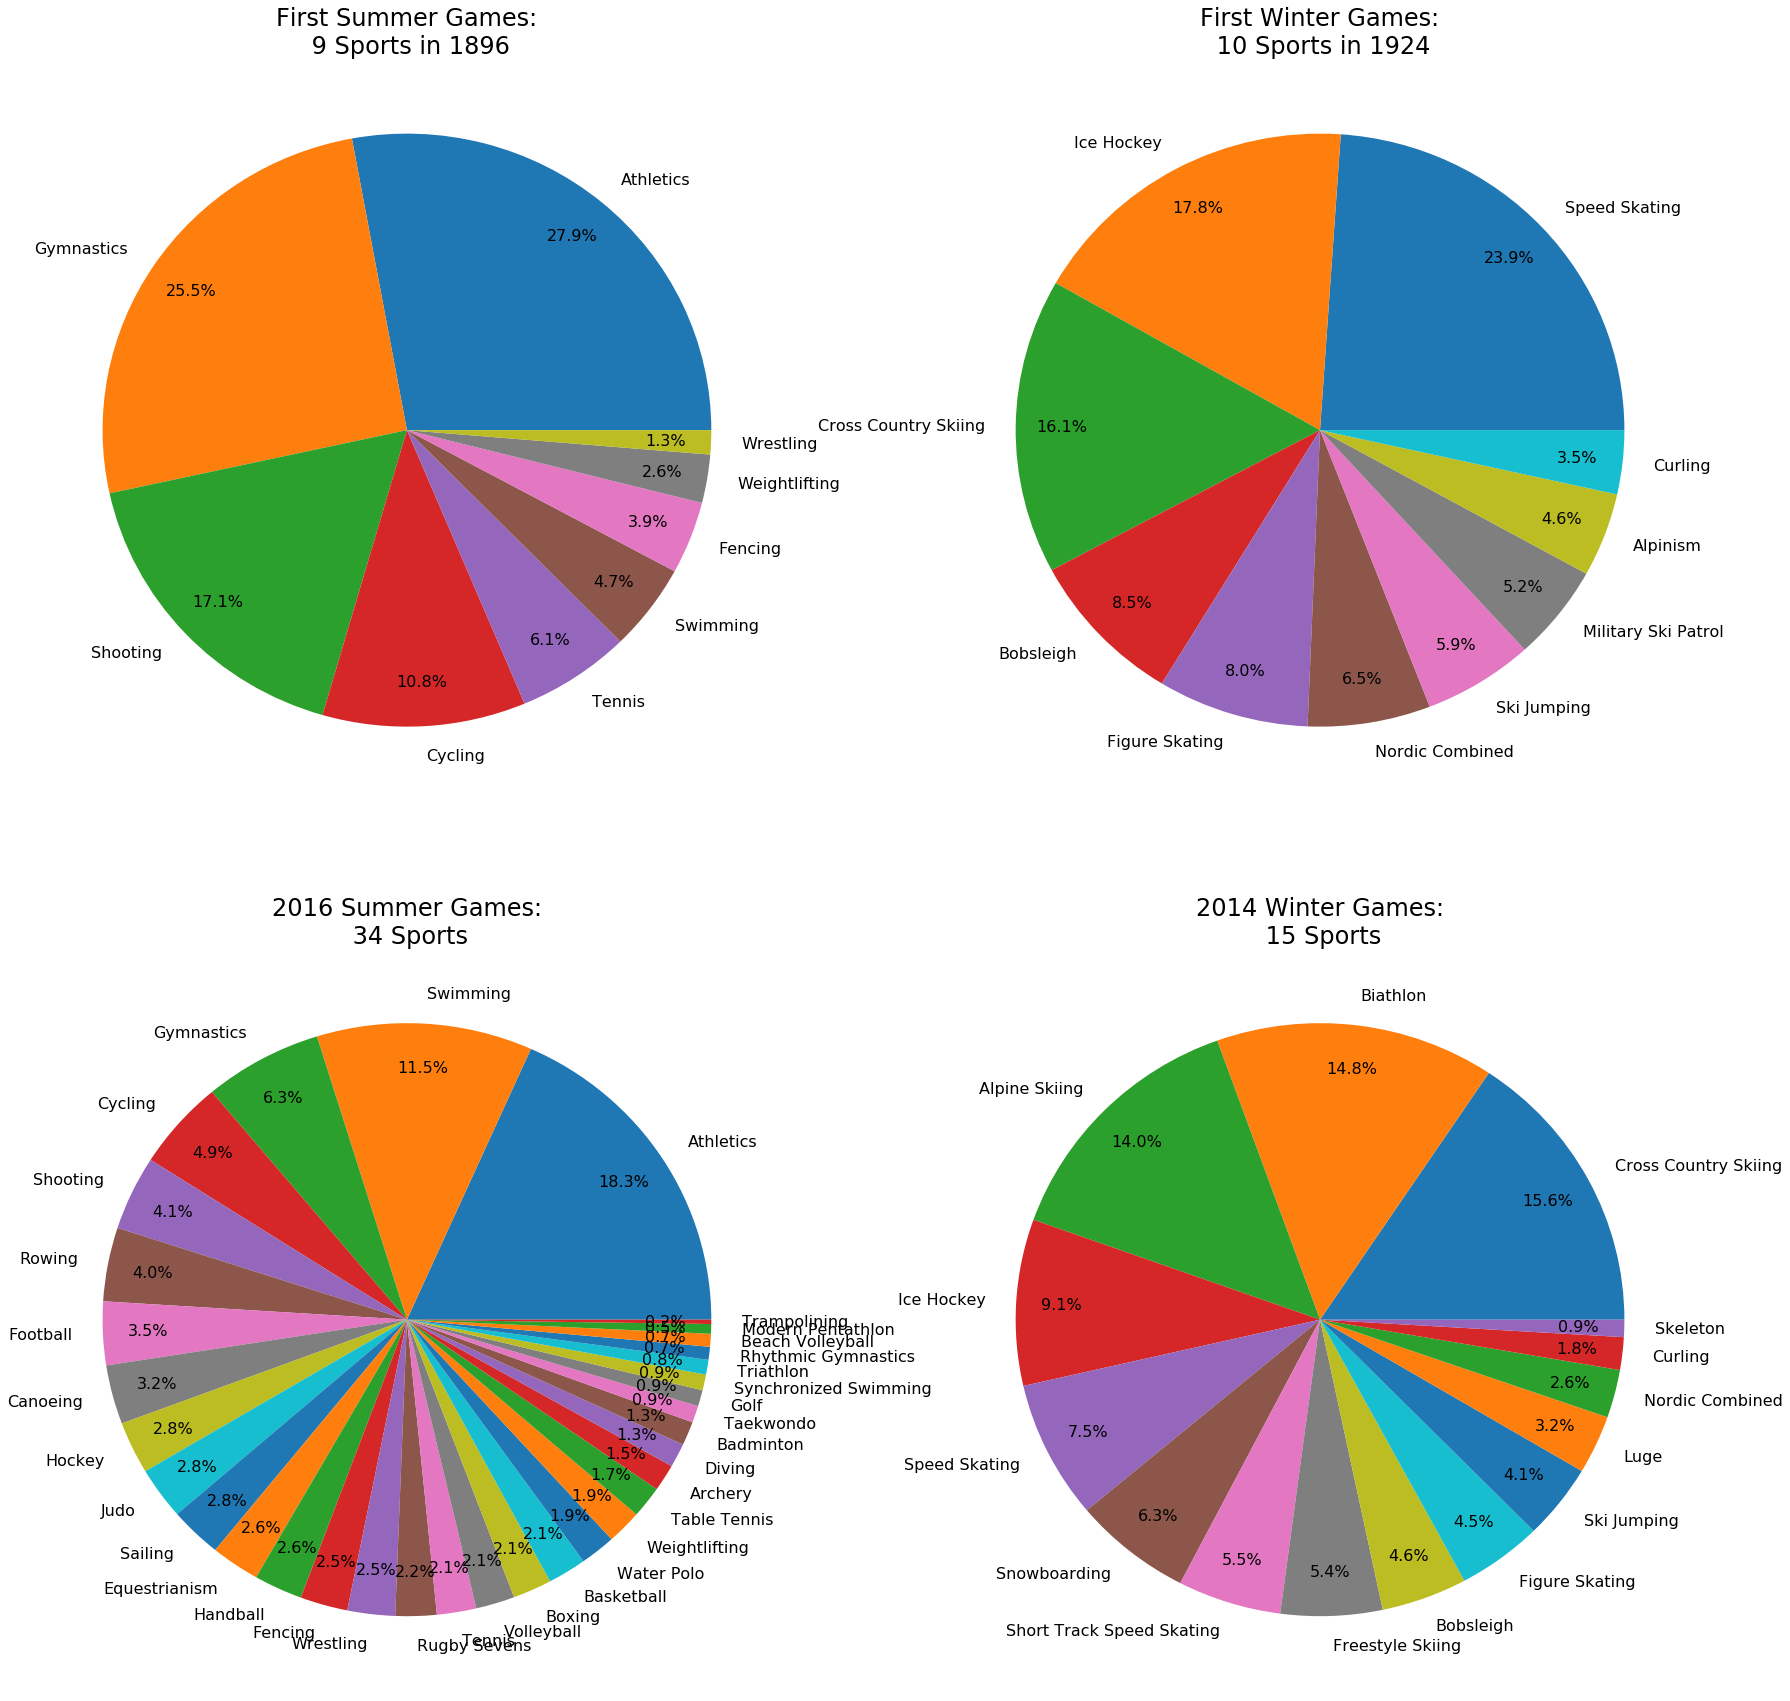

In [40]:
# show pie charts for sports in first year vs most recent year for winter and summer
# first year (summer = 1896)(winter = 1924)

df_by_year_season = df.groupby(['Year', 'Season']).count()
#print(df_by_year_season.head(10))
#print(df_by_year_season.tail(10))
first_summer = df[(df['Season'] == 'Summer') & (df['Year'] == 1896)]
first_winter = df[(df['Season'] == 'Winter') & (df['Year'] == 1924)]

first_summer_counts = first_summer.Sport.value_counts()
first_winter_counts = first_winter.Sport.value_counts()
#print(first_summer_counts)

summer1label = first_summer_counts.index.tolist()
winter1label = first_winter_counts.index.tolist()

#sports for most recent olympics (summer=2016)(winter=2014)
summer2016 = df[(df['Season'] == 'Summer') & (df['Year'] == 2016)]
summer2016_counts = summer2016.Sport.value_counts()
summer2016label = summer2016_counts.index.tolist()

winter2014 = df[(df['Season'] == 'Winter') & (df['Year'] == 2014)]
winter2014_counts = winter2014.Sport.value_counts()
winter2014label = winter2014_counts.index.tolist()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 30))
ax1.set_title('First Summer Games:\n 9 Sports in 1896', fontsize='24')
ax1.pie(first_summer_counts, labels=summer1label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax2.set_title('First Winter Games:\n 10 Sports in 1924', fontsize='24')
ax2.pie(first_winter_counts, labels=winter1label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax3.set_title('2016 Summer Games:\n 34 Sports', fontsize='24')
ax3.pie(summer2016_counts, labels=summer2016label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax4.set_title('2014 Winter Games:\n 15 Sports', fontsize='24')
ax4.pie(winter2014_counts, labels=winter2014label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})

plt.show()


These pie charts represent the number of sports for the first Olympics and for the most recent games separated by season.  **The percentages are based on the number of athletes that competed in each event of each sport.** The number of sports in the Summer Games has drastically increased, nearly quadrupling from 9 to 34.  The Winter games stayed much more consistant, only increasing from 10 to 15 games.  The table below contains a list of sports for each of the plots.

In [10]:
#create a data table grouped by year and sport for the first and present games
my_dict_sum = dict({'First Summer Games':summer1label, '2016 Summer Games':summer2016label})
my_dict_win = dict({'First Winter Games':winter1label, '2014 Winter Games':winter2014label})
pie_table_sum = pd.DataFrame.from_dict(my_dict_sum, orient='index')
pie_table_win = pd.DataFrame.from_dict(my_dict_win, orient='index')

print(pie_table_sum.transpose()[['First Summer Games', '2016 Summer Games']])
print(pie_table_win.transpose()[['First Winter Games', '2014 Winter Games']])


   First Summer Games      2016 Summer Games
0           Athletics              Athletics
1          Gymnastics               Swimming
2            Shooting             Gymnastics
3             Cycling                Cycling
4              Tennis               Shooting
5            Swimming                 Rowing
6             Fencing               Football
7       Weightlifting               Canoeing
8           Wrestling                 Hockey
9                None                   Judo
10               None                Sailing
11               None          Equestrianism
12               None               Handball
13               None                Fencing
14               None              Wrestling
15               None           Rugby Sevens
16               None                 Tennis
17               None             Volleyball
18               None                 Boxing
19               None             Basketball
20               None             Water Polo
21        

Now you have explored the progression of events for the Olympics over the years.  The increase in the number of events throughout the games rears questions about the total number of medals won in each event.  The total number of medals won in each event might leave you curious about the top athletes for each event.  Thinking about the top atheletes for each event may make you ask....

<font size=5><center>**Who won the most medals in the Olympics...?**</font></center>

Moving forward, adding new ways of comparing the countries could make for improved analysis.  Adding data about GDP or size of country we could look at how the wealth or size of a nation plays into the total number of medals won or athletes sent.

Looking at predictive models to forecast the outcome of events would be something interesting to consider.  It would be pretty involved given the number of events and way athletes can qualify for each event.  Maybe alternative methods for modeling would better fit the dataset.

Another analysis to consider is normalizing to see how the medals are distributed or the athletes compare without bias.  The code below has attempted this.  The first attempt was done by 'normalizing' medals and athletes per year on the total number of medals and athletes respectively.  The latter attempt was done by using the 'max/min normalization' (y=(x - xmin)/(xmax - xmin)) for medals and athletes each year.

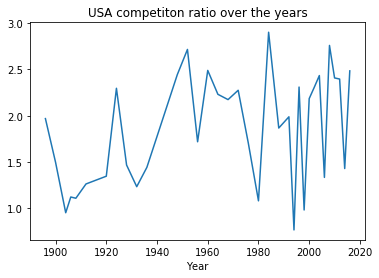

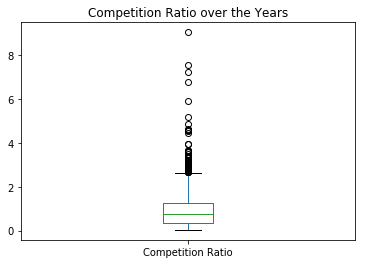

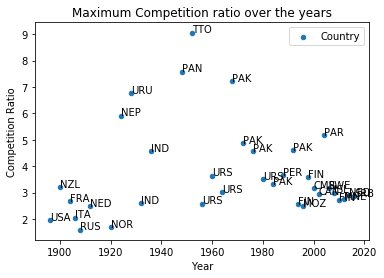

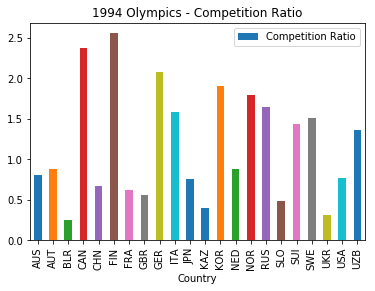

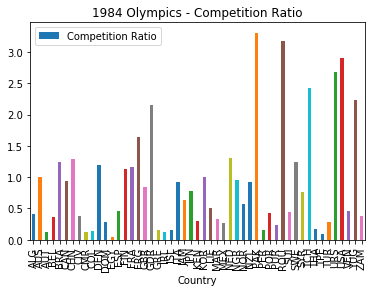

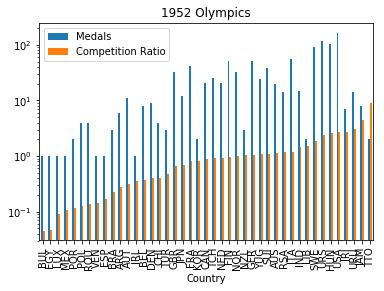

In [11]:
#sort by year and NOC
athletes_per_year = df.groupby('Year')[['Name', 'Medal']].count()
athletes_per_year.columns=['Total Athletes', 'Total Medals']
grouped_NOC = df.groupby(['Year','NOC'])['Name', 'Medal'].count()
test = pd.DataFrame(grouped_NOC).reset_index()
merge1 = pd.merge(athletes_per_year, test[['Year', 'NOC', 'Medal', 'Name']], how='outer', on='Year')
#print(merge1)

merge1.columns = ['Year', 'Total Athletes', 'Total Medals', 'Country', 'Medals', 'Athletes']

# normalized medals is the number of medals won per country for each year divided by the total number of medals won for that year
merge1['Normalized Medals'] = merge1.Medals/merge1['Total Medals']

# normalized athletes is number of athletes per country normalized by total number of athletes competeting for that year
merge1['Normalized Athletes'] = merge1.Athletes/merge1['Total Athletes']

# this is a comparision of the normalized medals to normalized athletes per year
merge1['Competition Ratio'] = merge1['Normalized Medals']/merge1['Normalized Athletes']
merge1['Ratio'] = merge1['Medals']/merge1['Athletes']
#print(merge1)

merge1a = merge1.drop(columns=['Total Athletes', 'Total Medals']).set_index(['Year', 'Country'])
#merge1a = merge1.sort_index()

#drop zeros from competition ratio
drop_zero = merge1a['Medals']==0
merge1a = merge1a.drop(merge1a.index[drop_zero])
#print(merge1a)
#print(merge1a.head(20))
#print(merge1a.loc[1896])
#print(merge1a.loc[[1896], ['Normalized Medals']].sum())
#print(merge1a.loc[[1896], ['Normalized Athletes']].sum())


# plot competition ratio over time for USA
comp_usa = merge1[merge1['Country'] == 'USA']
comp_usa = comp_usa.set_index('Year')
comp_ratio_usa = comp_usa['Competition Ratio']
comp_ratio_usa.plot(kind='line', title='USA competiton ratio over the years')

#Maximum competition ratio for each year
# *** want to create a list of Country names for each max value to display on plot ***
tot_comp_ratio = merge1[['Year', 'Competition Ratio']]
max_comp_ratio = tot_comp_ratio.groupby('Year').max()
max_comp_ratio = pd.DataFrame(max_comp_ratio).reset_index()
#print(merge1a.loc[1952])

#max_comp_ratio.plot(x='Year', y='Competition Ratio', kind='scatter', title='Maximum Competition ratio over the years')
plt.show()


#start with merge1a and unstack and calcualte max on competition ratio to find associated Country
max_country_comp = pd.DataFrame(merge1a).reset_index()
list_of_max_values = max_country_comp.groupby('Year')['Competition Ratio'].max().tolist()

max_country_comp.plot(kind='box', x='Year', y='Competition Ratio', title="Competition Ratio over the Years")
plt.show()

max_country_comp = max_country_comp[['Competition Ratio', 'Country', 'Year']]
max_country_comp = max_country_comp.set_index('Year')
max_country_comp = max_country_comp.groupby(['Year', 'Competition Ratio'])['Country'].max()
max_country_comp = max_country_comp.loc[:,list_of_max_values]

country_names = pd.DataFrame(max_country_comp).reset_index()
list_of_max_names = country_names['Country'].tolist()
#print(max_country_comp)
#print(list_of_max_values)
#print(len(list_of_max_values))
#print(list_of_countries_max)
#print(type(country_names))
#print(country_names)
#print(list_of_max_names)

#fig = plt.figure(figsize=(10,10))
country_names.plot(kind='scatter', x='Year', y='Competition Ratio', label='Country', title='Maximum Competition ratio over the years')
#list of max names = list of Country names associated with max competition ratio -> use as label for scatter plot
#create list of years -> years
years = country_names.Year.tolist()
#print(years)

#create list of competition ratio -> comp_ratio
comp_ratio = country_names['Competition Ratio'].tolist()
#print(comp_ratio)

for label, x, y in zip(list_of_max_names, years, comp_ratio):
    #print(label)
    #print(x)
    #print(y)
    plt.annotate(label, xy=(x, y))
plt.show()


#print(comp_ratio_usa.idxmin())
#print(comp_ratio_usa.idxmax())
#print(merge1a.loc[comp_ratio_usa.idxmin()])
#print(merge1a.loc[comp_ratio_usa.idxmax()])

min_comp = merge1a.loc[[comp_ratio_usa.idxmin()],['Competition Ratio']]
max_comp = merge1a.loc[[comp_ratio_usa.idxmax()],['Competition Ratio']]
min_comp = pd.DataFrame(min_comp).reset_index()
max_comp = pd.DataFrame(max_comp).reset_index()
#print(min_comp)
min_comp.plot(kind='bar', x='Country', y='Competition Ratio', title='1994 Olympics - Competition Ratio')
plt.show()
plt.clf()
plt.close()

#fig = plt.figure(figsize=(10,10))
max_comp.plot(kind='bar', x='Country', y='Competition Ratio', title='1984 Olympics - Competition Ratio')
plt.show()

#lets take a look at the 1952 olympics
df1952 = merge1a.loc[1952]
#print(df1952[['Medals', 'Athletes', 'Competition Ratio']])
#print(merge1a)
df1952_medals_comp_ratio = df1952[['Medals', 'Competition Ratio']]
df1952_medals_comp_ratio = df1952_medals_comp_ratio[df1952_medals_comp_ratio.Medals != 0].sort_values("Competition Ratio")
df1952_medals_comp_ratio.plot(kind='bar', logy=True, title='1952 Olympics')
plt.show()

These plots are based on a value created for visualition called the competition ratio.  The competition ratio is the ratio of "normalized" medals to "normalized" athletes.  These "normalized" values are found by dividing the number of medals and atheletes by the total number of medals and athletes per year.  This competition ratio can be considered a measure of the rank for each country for each year.  It is a numeric representation of the number medals won divided by number of athletes per country both normalized by their totals per year.  The last plot shows the total medals vs the competition ratio for the countries competing in the 1952 olympic games.  This was selected because it contained the maximum competition ratio value in the set.  This occurred for TTO (Trinidad and Tobago) in 1952 when they sent 2 athletes and they both won medals.  More accurate normalization will follow...

will attempt to normalize using the max-min normalization:

yi = (xi -xmin)/(xmax - xmin)

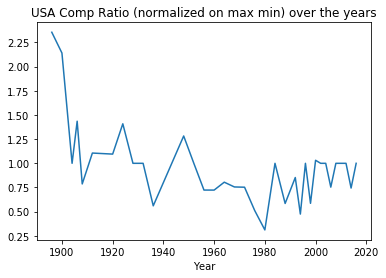

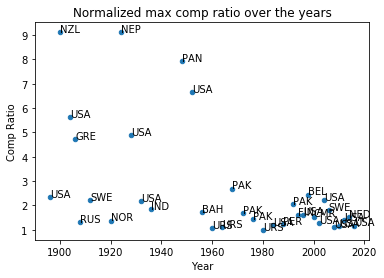

In [12]:
# Lets look at the Athletes, number of medals, and countries grouped by year normalized on min max
# of athletes and medals per year

#print(df.head())
year = df.groupby(['Year', 'NOC']).agg({'Name':'count', 'Medal':'count'})

yearlist = df['Year'].sort_values().unique()
#print(yearlist)

min_athlete = []
max_athlete = []
min_medal = []
max_medal = []

for yr in yearlist:
    min_athlete.append(year.loc[yr].min()[0])
    max_athlete.append(year.loc[yr].max()[0])
    min_medal.append(year.loc[yr].min()[1])
    max_medal.append(year.loc[yr].max()[1])

min_athlete = np.array(min_athlete)
max_athlete = np.array(max_athlete)
min_medal = np.array(min_medal)
max_medal = np.array(max_medal)
Athlete_Delta = max_athlete - min_athlete
Medal_Delta = max_medal - min_medal

year = year.reset_index()
year = year.set_index('Year')
temp = zip(min_athlete, Athlete_Delta, min_medal, Medal_Delta)
temp1 = zip(yearlist, temp)
Delta = dict(temp1)
#print(Delta)
df_delta = pd.DataFrame(Delta)
df_delta = df_delta.transpose()
df_delta = df_delta.reset_index()
df_delta.columns = ['Year','Athlete Min','Athlete Delta', 'Medal Min', 'Medal Delta']
df_delta = df_delta.set_index('Year')
#print(df_delta)
#print(year)

#print(df.groupby('Year')['Medal'].count())

norm_df = pd.merge(year, df_delta, left_on='Year' , right_on='Year', how='outer')
norm_df = norm_df.reset_index()
norm_df.columns = ['Year', 'Country', 'Athlete', 'Medals', 'Athlete Min', 'Athlete Delta', 'Medal Min', 'Medal Delta']
norm_df['Normalized Athletes'] = (norm_df['Athlete'] - norm_df['Athlete Min'])/norm_df['Athlete Delta']
norm_df['Normalized Medals'] = (norm_df['Medals'] - norm_df['Medal Min'])/norm_df['Medal Delta']
norm_df['Comp Ratio'] = norm_df['Normalized Medals']/norm_df['Normalized Athletes']
norm_df = norm_df[['Year', 'Country', 'Athlete', 'Medals', 'Normalized Athletes', 'Normalized Medals', 'Comp Ratio']]
norm_df = norm_df.set_index(['Year', 'Country'])

#print(norm_df.head())

# we need to fix the inf and NaN values in the Comp Ratio column
mask = norm_df['Comp Ratio'] != np.inf
norm_df.loc[~mask, 'Comp Ratio'] = norm_df.loc[mask, 'Comp Ratio'].max()
norm_df = norm_df.fillna(0)

#print(norm_df)

# lets look at the same plots as above using the max min normalized data
# USA comp ratio over time

USA = norm_df.loc[(slice(None), 'USA'),:]
USA = USA.reset_index()
USA = USA.set_index('Year')
USA = USA['Comp Ratio']
USA.plot(kind='line', title='USA Comp Ratio (normalized on max min) over the years')
plt.show()

#grab list of countries by max comp ratio and list of x and y coordinates to label on scatter plot
countries = norm_df.reset_index()
countries_list = countries.groupby(['Year', 'Comp Ratio'])['Country'].max()

max_comp_ratio_list = norm_df.groupby('Year').max()
max_comp_ratio_list = max_comp_ratio_list['Comp Ratio'].tolist()

countries_list = countries_list.loc[:, max_comp_ratio_list]
countries_list = pd.DataFrame(countries_list).reset_index()
countries_list = countries_list.groupby('Year').max()
countries_list = countries_list['Country'].tolist()
#print(countries_list)


# lets plot the max comp ratio vs time
max_comp = norm_df.groupby('Year').max()
#print(max_comp)
max_comp = max_comp.reset_index()
max_comp.plot(kind='scatter', x='Year', y='Comp Ratio', title='Normalized max comp ratio over the years')

year = max_comp_ratio['Year'].tolist()
for label, x, y in zip(countries_list, year, max_comp_ratio_list):
    plt.annotate(label, xy = (x, y))
plt.show()
